<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data
import lightgbm as lgbm

import optuna
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn catboost  xgboost optuna  ray[tune]

zsh:1: no matches found: ray[tune]


In [3]:
# import sys
# !conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm
!pip install lightgbm pandas_datareader

In [4]:


RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [5]:



data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [7]:
### Ваш код ###

X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
### Ваш код ###

acc_DT = 0
acc_Bagging = 0
acc_RF = 0

results_regression = pd.DataFrame(columns = ['model', 'task', 'R2'])

acc_DT = cross_val_score(DecisionTreeClassifier(), X, y, cv=3, scoring='accuracy').mean()
acc_Bagging = cross_val_score(BaggingClassifier(n_estimators=100), X, y, cv=3, scoring='accuracy').mean()
acc_RF = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=3, scoring='accuracy').mean()

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
print('RandomForestClassifier показала лучший результат.')
results

RandomForestClassifier показала лучший результат.


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



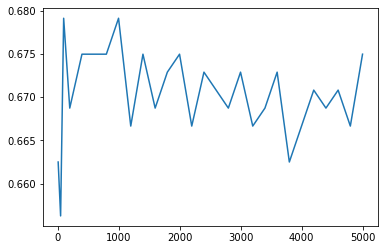

In [9]:
### Ваш код ###

scores = []
n_est = [10, 50, 100, 200]
for i in range(400, 5001, 200):
    n_est.append(i)
    
for tree in n_est:
    model = RandomForestClassifier(n_estimators=tree, n_jobs=-1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
df = pd.DataFrame({'trees' : n_est, 'scores' : scores})

plt.plot(df.trees, df.scores)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [10]:
### Ваш код ###

acc_sklearn = 0
acc_xgboost = 0

acc_sklearn = cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring ='accuracy').mean()
le = LabelEncoder()
y_1 = le.fit_transform(y)
acc_xgboost = cross_val_score(XGBClassifier(), X, y_1, cv=3, scoring ='accuracy').mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
print('GradientBoostingClassifier точнее, однако XGboost работает быстрее, но менее точно.')
results

GradientBoostingClassifier точнее, однако XGboost работает быстрее, но менее точно.


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [11]:
### Ваш код ###

acc_sklearn_cv = 0
acc_xgboost_cv = 0
best_params_sklearn = {}
search_best_params = {}

parameters = {'learning_rate': np.linspace(0.01,1,10),
                  'n_estimators' : range (1, 10),
                  'max_depth'    : range (1, 10)}

def search_best_params(model, param_grid, X, y):
    grid_search  = GridSearchCV(model, param_grid = param_grid, cv = 3, n_jobs=-1)
    %time grid_search.fit(X, y)
    print(grid_search.best_params_)
    cross_val = cross_val_score(model, X, y, cv=3, scoring ='accuracy').mean()
    print(f'accuracy: {cross_val}')
    return cross_val

print('Параметры лучшей модели sklearn:\n')
best_params_sklearn = search_best_params(GradientBoostingClassifier(), parameters, X, y)

print('\n\nПараметры лучшей модели xgboost:\n')
best_params_xgboost = search_best_params(XGBClassifier(), parameters, X, y_1)

results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', best_params_sklearn]
results.loc[6] = ['XGBClassifier_CV', 'task5', best_params_xgboost]
results

Параметры лучшей модели sklearn:

CPU times: user 6.69 s, sys: 659 ms, total: 7.35 s
Wall time: 1min 23s
{'learning_rate': 0.23, 'max_depth': 2, 'n_estimators': 8}
accuracy: 0.5397123202001252


Параметры лучшей модели xgboost:

CPU times: user 3.34 s, sys: 98.2 ms, total: 3.44 s
Wall time: 24.5 s
{'learning_rate': 0.78, 'max_depth': 3, 'n_estimators': 4}
accuracy: 0.5284552845528455


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [12]:
# ### Ваш код ###

acc_lightgbm = 0
acc_catboost = 0

print('GradientBoostingClassifier = ',end=' ')
print(cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring ='accuracy').mean())

print('XGBClassifier = ',end=' ')
print(cross_val_score(XGBClassifier(), X, y_1, cv=3, scoring ='accuracy').mean())

print('LGBMClassifier = ',end=' ')
acc_lightgbm  = cross_val_score(LGBMClassifier(), X, y, cv=3, scoring ='accuracy').mean()
print(acc_lightgbm)

print('CatBoostClassifier = ',end=' ')
acc_catboost = cross_val_score(CatBoostClassifier(verbose=False), X, y, cv=3, scoring ='accuracy').mean()
print(acc_catboost)

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

print('Вывод:\nXGBClassifier равен LGBMClassifier.\nGradientBoostingClassifier - лучшая модель, однако CatBoostClassifier немного устуапает, но дольше всех работает.')
results

GradientBoostingClassifier =  0.5390869293308317
XGBClassifier =  0.5284552845528455
LGBMClassifier =  0.5284552845528455
CatBoostClassifier =  0.5328330206378987
Вывод:
XGBClassifier равен LGBMClassifier.
GradientBoostingClassifier - лучшая модель, однако CatBoostClassifier немного устуапает, но дольше всех работает.


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455
7,LGBMClassifier,task6,0.528455
8,CatBoostClassifier,task6,0.532833


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [13]:
### Ваш код ###

acc_lightgbm_cv = 0
acc_catboost_cv = 0

acc_lightgbm_cv = search_best_params(LGBMClassifier(), parameters, X, y)
print('Параметры лучшей модели lightgbm:\n', acc_lightgbm_cv)
acc_catboost_cv = search_best_params(CatBoostClassifier(verbose=False), parameters, X, y)
print('Параметры лучшей модели catboost:\n', acc_catboost_cv)

results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

print('CatBoostClassifier работает точнее LGBMClassifier, но медленнее.')
results

CPU times: user 2.43 s, sys: 109 ms, total: 2.54 s
Wall time: 12.6 s
{'learning_rate': 0.23, 'max_depth': 3, 'n_estimators': 7}
accuracy: 0.5284552845528455
Параметры лучшей модели lightgbm:
 0.5284552845528455
CPU times: user 2.99 s, sys: 243 ms, total: 3.24 s
Wall time: 44.4 s
{'learning_rate': 0.34, 'max_depth': 5, 'n_estimators': 8}
accuracy: 0.5328330206378987
Параметры лучшей модели catboost:
 0.5328330206378987
CatBoostClassifier работает точнее LGBMClassifier, но медленнее.


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455
7,LGBMClassifier,task6,0.528455
8,CatBoostClassifier,task6,0.532833
9,LGBMClassifier_CV,task7,0.528455


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [56]:
## Ваш код ###

def objective(trial):
    le = LabelEncoder()
    y_1 = le.fit_transform(y)
    return  cross_val_score(XGBClassifier(tree_method='hist',
                                          n_estimators = trial.suggest_int('n_estimators', 1, 2),
                                          max_depth = trial.suggest_int('max_depth', 1, 10),
                                          learning_rate = trial.suggest_float('learning_rate', 0.6, 1.0),
                                          random_state=RANDOM_STATE), X, y_1, cv=3, scoring ='accuracy').mean()

study = optuna.create_study()
study.optimize(objective, n_trials=100)
best_params_xgboost_optuna = study.best_params
acc_xgboost_optuna = study.best_trial.value

print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]
results

[I 2023-02-19 22:37:49,429] A new study created in memory with name: no-name-47180aac-1988-425c-a0b1-c703e4f671b4
[I 2023-02-19 22:37:49,525] Trial 0 finished with value: 0.5328330206378987 and parameters: {'n_estimators': 1, 'max_depth': 9, 'learning_rate': 0.9266598773857455}. Best is trial 0 with value: 0.5328330206378987.
[I 2023-02-19 22:37:49,592] Trial 1 finished with value: 0.5328330206378987 and parameters: {'n_estimators': 1, 'max_depth': 9, 'learning_rate': 0.7834094030544578}. Best is trial 0 with value: 0.5328330206378987.
[I 2023-02-19 22:37:49,654] Trial 2 finished with value: 0.5322076297686054 and parameters: {'n_estimators': 2, 'max_depth': 1, 'learning_rate': 0.6171058785732914}. Best is trial 2 with value: 0.5322076297686054.
[I 2023-02-19 22:37:49,707] Trial 3 finished with value: 0.5697310819262039 and parameters: {'n_estimators': 1, 'max_depth': 3, 'learning_rate': 0.7729508190853388}. Best is trial 2 with value: 0.5322076297686054.
[I 2023-02-19 22:37:49,755] Tr

[I 2023-02-19 22:37:51,860] Trial 36 finished with value: 0.5403377110694184 and parameters: {'n_estimators': 1, 'max_depth': 8, 'learning_rate': 0.6578024020036539}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:51,933] Trial 37 finished with value: 0.5428392745465916 and parameters: {'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.7034087374756096}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:52,001] Trial 38 finished with value: 0.5328330206378987 and parameters: {'n_estimators': 1, 'max_depth': 9, 'learning_rate': 0.630622747304594}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:52,074] Trial 39 finished with value: 0.551594746716698 and parameters: {'n_estimators': 2, 'max_depth': 6, 'learning_rate': 0.6790983700452067}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:52,152] Trial 40 finished with value: 0.5409631019387117 and parameters: {'n_estimators': 2, 'max_depth': 8, 'learning

[I 2023-02-19 22:37:54,697] Trial 72 finished with value: 0.541588492808005 and parameters: {'n_estimators': 2, 'max_depth': 8, 'learning_rate': 0.6394028332639016}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:54,776] Trial 73 finished with value: 0.5365853658536585 and parameters: {'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.6744297127468772}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:54,845] Trial 74 finished with value: 0.5472170106316447 and parameters: {'n_estimators': 2, 'max_depth': 6, 'learning_rate': 0.6603197988326421}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:54,922] Trial 75 finished with value: 0.5340838023764852 and parameters: {'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.6283052564437165}. Best is trial 19 with value: 0.5303314571607255.
[I 2023-02-19 22:37:55,003] Trial 76 finished with value: 0.549718574108818 and parameters: {'n_estimators': 2, 'max_depth': 8, 'learning

Параметры лучшей модели xgboost:
 {'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.6419857419823847}


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455
7,LGBMClassifier,task6,0.528455
8,CatBoostClassifier,task6,0.532833
9,LGBMClassifier_CV,task7,0.528455


In [57]:
print('XGBClassifier_optuna показала чуть хуже результат чем на предыдущем тесте.')

XGBClassifier_optuna показала чуть хуже результат чем на предыдущем тесте.


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [58]:
### Ваш код ###

all_stack = []
acc_stacking_default = 0

all_stack = StackingClassifier(estimators=[ 
    ('gbc', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('xgbc', XGBClassifier(random_state=RANDOM_STATE)),
    ('lgbc', LGBMClassifier(random_state=RANDOM_STATE)),
    ('cbc', CatBoostClassifier(random_state=RANDOM_STATE, logging_level='Silent'))])
                                                                  
all_stack.fit(X_train, y_train)
acc_stacking_default = (accuracy_score(y_test, all_stack.predict(X_test))).mean()

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455
7,LGBMClassifier,task6,0.528455
8,CatBoostClassifier,task6,0.532833
9,LGBMClassifier_CV,task7,0.528455


In [ ]:
print('Лучший результат по сравнению со всеми предыдущими тестами')

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [59]:
### Ваш код ###

acc_stacking = 0

stacked = StackingClassifier(estimators=[
                ('CatBoostClassifier', CatBoostClassifier(learning_rate=0.34, max_depth=5, n_estimators=8)),
                ('LGBMClassifier', LGBMClassifier(learning_rate=0.23, max_depth=3, n_estimators=7)),
                ('GradientBoostingClassifier', GradientBoostingClassifier(learning_rate=0.23, max_depth=2, n_estimators=8)),
                ('XGBClassifier', XGBClassifier(learning_rate=0.78, max_depth=3, n_estimators=4))])

acc_stacking = cross_val_score(stacked, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

results.loc[13] = ['Stacking', 'task10', acc_stacking]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.462164
1,BaggingClassifier,task2,0.554722
2,RandomForestClassifier,task2,0.562852
3,GradientBoostingClassifier,task4,0.541588
4,XGBClassifier,task4,0.528455
5,GradientBoostingClassifier_CV,task5,0.539712
6,XGBClassifier_CV,task5,0.528455
7,LGBMClassifier,task6,0.528455
8,CatBoostClassifier,task6,0.532833
9,LGBMClassifier_CV,task7,0.528455


In [ ]:
print('Результат уступает предыдущему тесту, однако более точен, чем все остальные.')